In [1]:
%display typeset

## Exemple
###  Trouver et classifier les points critiques de $f(x,y) = x^4 +y^4-4xy+1$
###  Maximiser et minimiser $f$ sur $[0,3]\times [0,2]$.

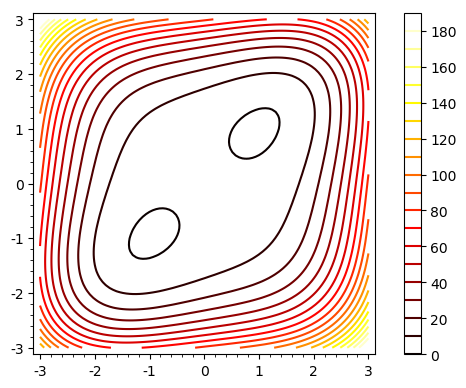

In [11]:
var('x,y')
f(x,y) = x^4+y^4-4*x*y+1
C= contour_plot(f, (x,-3,3), (y,-3, 3),cmap='hot',contours = 20,linestyles='solid', fill=False, colorbar=True)
show(C)

In [12]:
df = f.gradient()
df(x,y)

(4*x^3 - 4*y, 4*y^3 - 4*x)

In [17]:
assume(x, "real")
assume(y, "real")
Critiques = solve([df[0](x,y) ==0, df[1](x,y) ==0],[x,y] ) #Cecu donne des solutions complexes
RealCritiques = [Critiques[j] for j in [4,5,6]]
RealCritiques

[[x == -1, y == -1], [x == 1, y == 1], [x == 0, y == 0]]

On va calculer le hessien de $f$, puis sa valeur aux points critiques

In [21]:
H(x,y) = det(f.hessian()(x,y))
H(x,y)

144*x^2*y^2 - 16

In [28]:
P0 = (0,0)
P1 = (1,1)
P2 = (-1,-1)
Pts = [P0,P1,P2]
[H(p[0],p[1]) for p in Pts]

[-16, 128, 128]

On a donc deux extrémums, et un point de selle.

Voyons maintenant la restruction du problème au bord du domaine. Ci-bas on calcule la valeur de $f$ au point critique à l'intérieur de $[0,3]\times [0,2]$ ainsi qu'aux coins du domaine.

In [29]:
P1 = (1,1)
B1 = (3,0)
B2=(3,3^(1/3))
B3 = (3,2)
B4=(2^(1/3),2)
B5 = (0,2)
B6 = (0,0)
ListePoints = [P1,B1,B2,B3,B4,B5,B6]
ListePoints
[f(P[0],P[1]) for P in ListePoints] # Les valeurs exactes
[f(P[0],P[1]).n(digits = 4) for P in ListePoints] # Une aprox décimale

[-1.000, 82.00, 69.02, 74.00, 9.440, 17.00, 1.000]

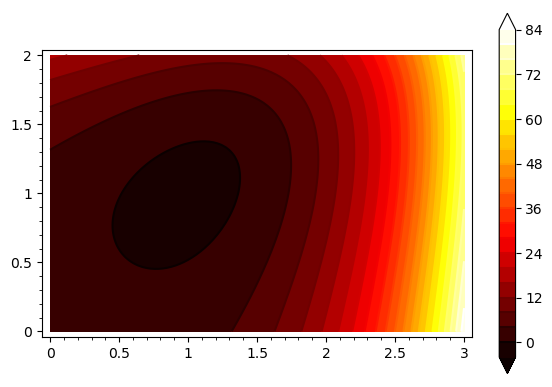

In [10]:
C1= contour_plot(f, (x,0,3), (y,0, 2),cmap='hot',contours = 20,linestyles='solid', fill=True, colorbar=True)
C1.show()

In [34]:
cm = colormaps.hot
def c(x,y): return float(f(x,y) / 82)
S = plot3d(f(x,y),(x,0,3),(y,0,2),color = (c, cm))
S.show(aspect_ratio = [10,10,1])

Graphics3d Object